In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from Oinfo import data2gaussian
from Oinfo.oinfo_gc import nplet_tc_dtc, multi_order_meas_gc

/home/laouen.belloli/Documents/git/Oinformation/Oinfo/oinfo_gc.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
def generate_herarchical_synergy(alpha=1.0, beta=1.0, n=1000):
    # Generate base random variables
    Z1, Z2, Z3, Z4, Z5, Z6 = np.random.normal(0, 1, (6, n))

    # Generate dependent variables
    X1 = Z1
    X2 = Z2 + alpha*np.exp(Z3)
    X3 = (np.log(alpha*np.abs(Z2) + 1) + 1) * Z3
    X4 = np.sin(Z4) + alpha*np.cos(Z5)
    X5 = (Z4 / (Z4-alpha*(Z4+1))) * np.sin(Z5)
    X6 = Z6 + beta*(np.sin(X2 + X3) + np.cos(X4 + X5))

    return pd.DataFrame({
        'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6,
        'Z1': Z1, 'Z2': Z2, 'Z3': Z3, 'Z4': Z4, 'Z5': Z5, 'Z6': Z6
    })

def generate_flat_synergy(alpha=1.0, beta=1.0, gamma=1.0, n=1000):
    # Generate random samples
    Z00, Z01, Z1, Z2, Z3, Z4, Z5, Z6 = [np.random.normal(0, 1, n) for _ in range(8)]

    # Define the variables
    X1 = alpha*np.log(np.abs(Z00) + 1) +     beta*Z01   +  gamma*Z1
    X2 = alpha*Z00                     +     beta*Z01   +  gamma*Z2
    X3 = alpha*np.power(Z00,2)         +     beta*Z01   +  gamma*Z3
    X4 = alpha*np.exp(Z00)             +     beta*Z01   +  gamma*Z4
    X5 = alpha*np.sin(Z00)             +     beta*Z01   +  gamma*Z5
    X6 = alpha*np.cos(Z00)             +     beta*Z01   +  gamma*Z6

    return pd.DataFrame({
        'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6,
        'Z1': Z1, 'Z2': Z2, 'Z3': Z3, 'Z4': Z4, 'Z5': Z5, 'Z6': Z6,
        'Z00': Z00, 'Z01': Z01
    })

In [3]:
def plot_pairwise_distributions(data):

    sns.pairplot(data, kind='hist', plot_kws={'alpha': 0.6}, corner=True)

    plt.tight_layout()
    plt.show()

def plot_variable_pairs(matrix1, matrix2):
    """
    Plots scatter plots for each pair of corresponding variables from two matrices.
    
    Parameters:
    - matrix1 (np.ndarray): First data matrix of size T x N.
    - matrix2 (np.ndarray): Second data matrix of size T x N.
    """
    # Get the number of variables (columns)
    N = matrix1.shape[1]
    
    # Create a figure with subplots in a grid
    fig, axs = plt.subplots(1, N, figsize=(5 * N, 4))  # Adjust subplot size and figure size as needed
    
    # Iterate over each variable
    for i in range(N):
        ax = axs[i] if N > 1 else axs  # Handling both single and multiple subplots
        ax.scatter(matrix1[:, i], matrix2[:, i], alpha=0.5)  # Plot scatter plot of variable i
        ax.set_title(f'Variable {i+1}')
        ax.set_xlabel('Matrix 1 Variable {}'.format(i+1))
        ax.set_ylabel('Matrix 2 Variable {}'.format(i+1))
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

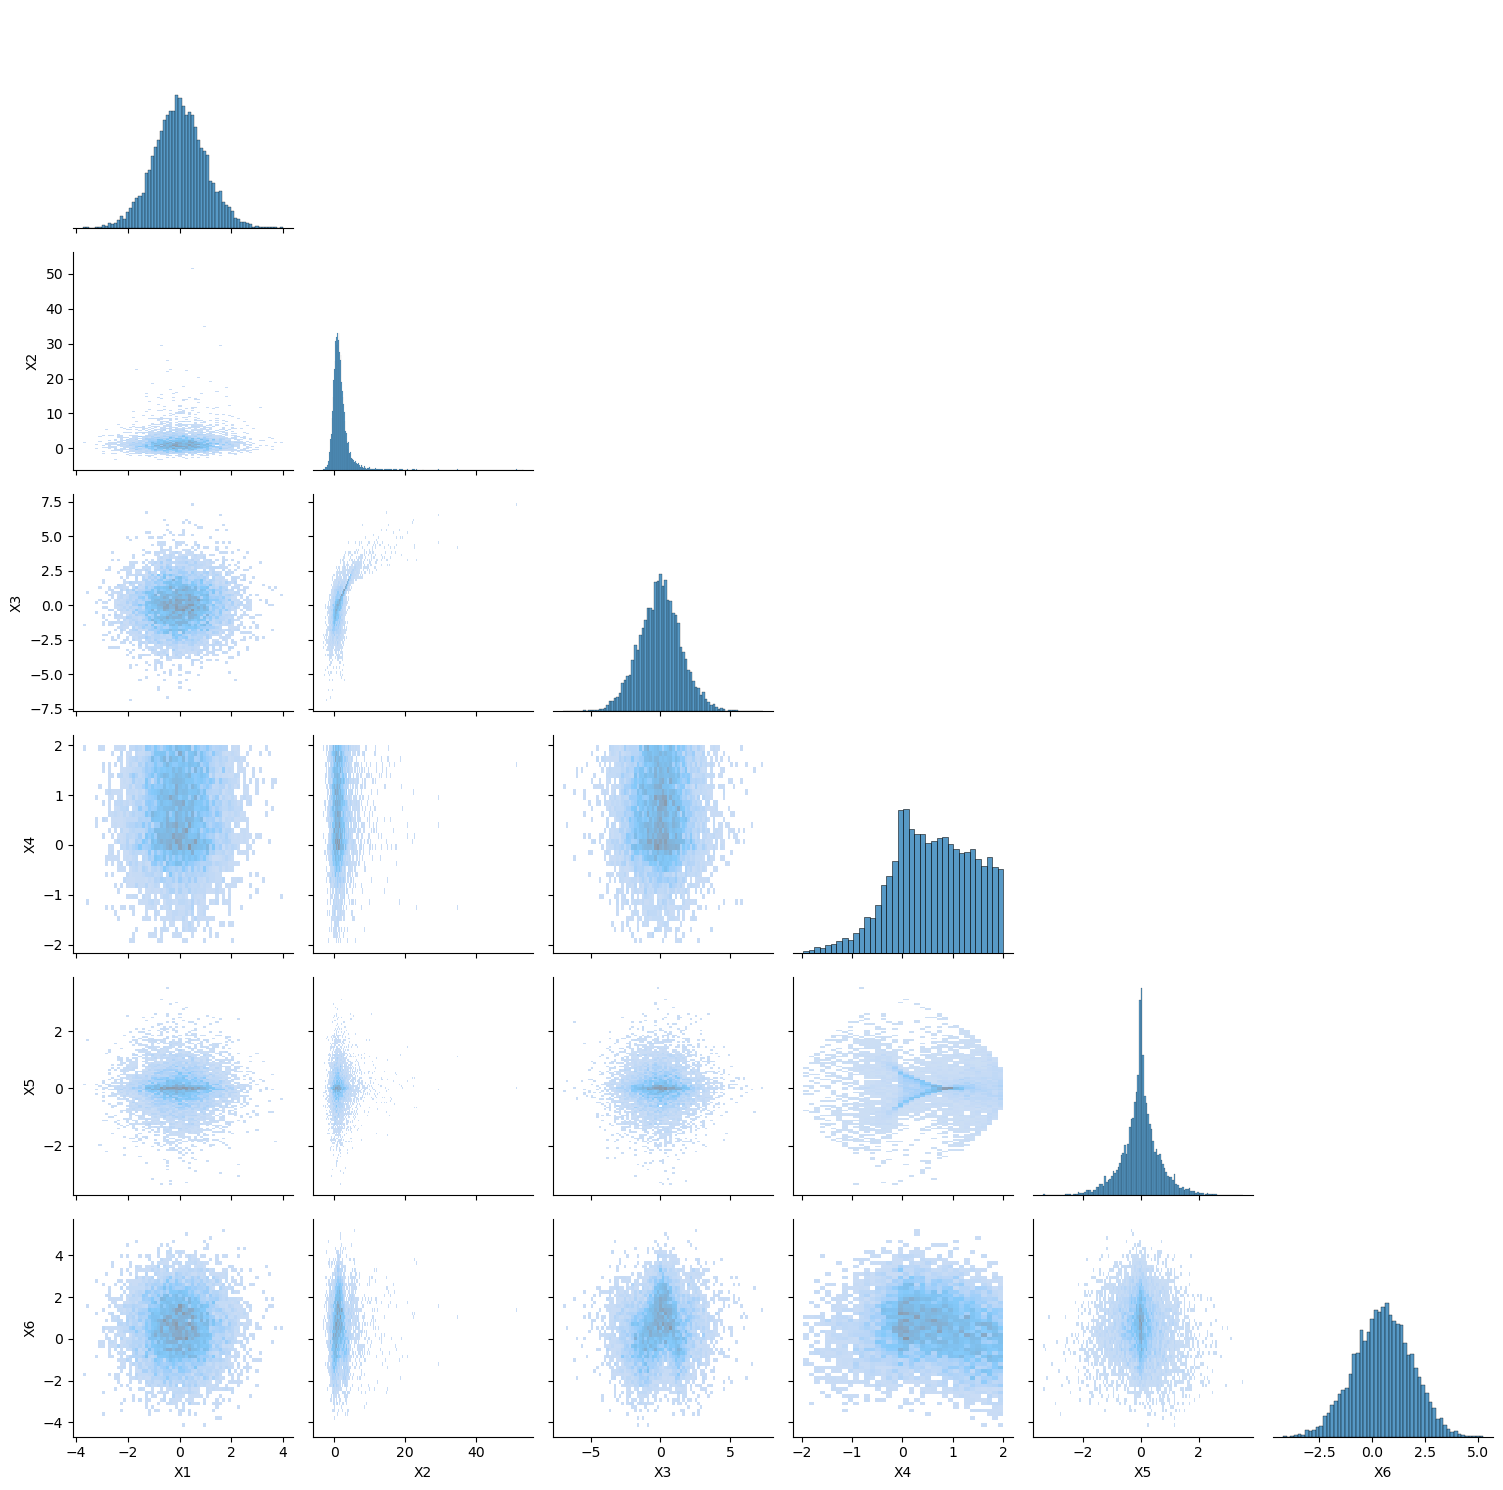

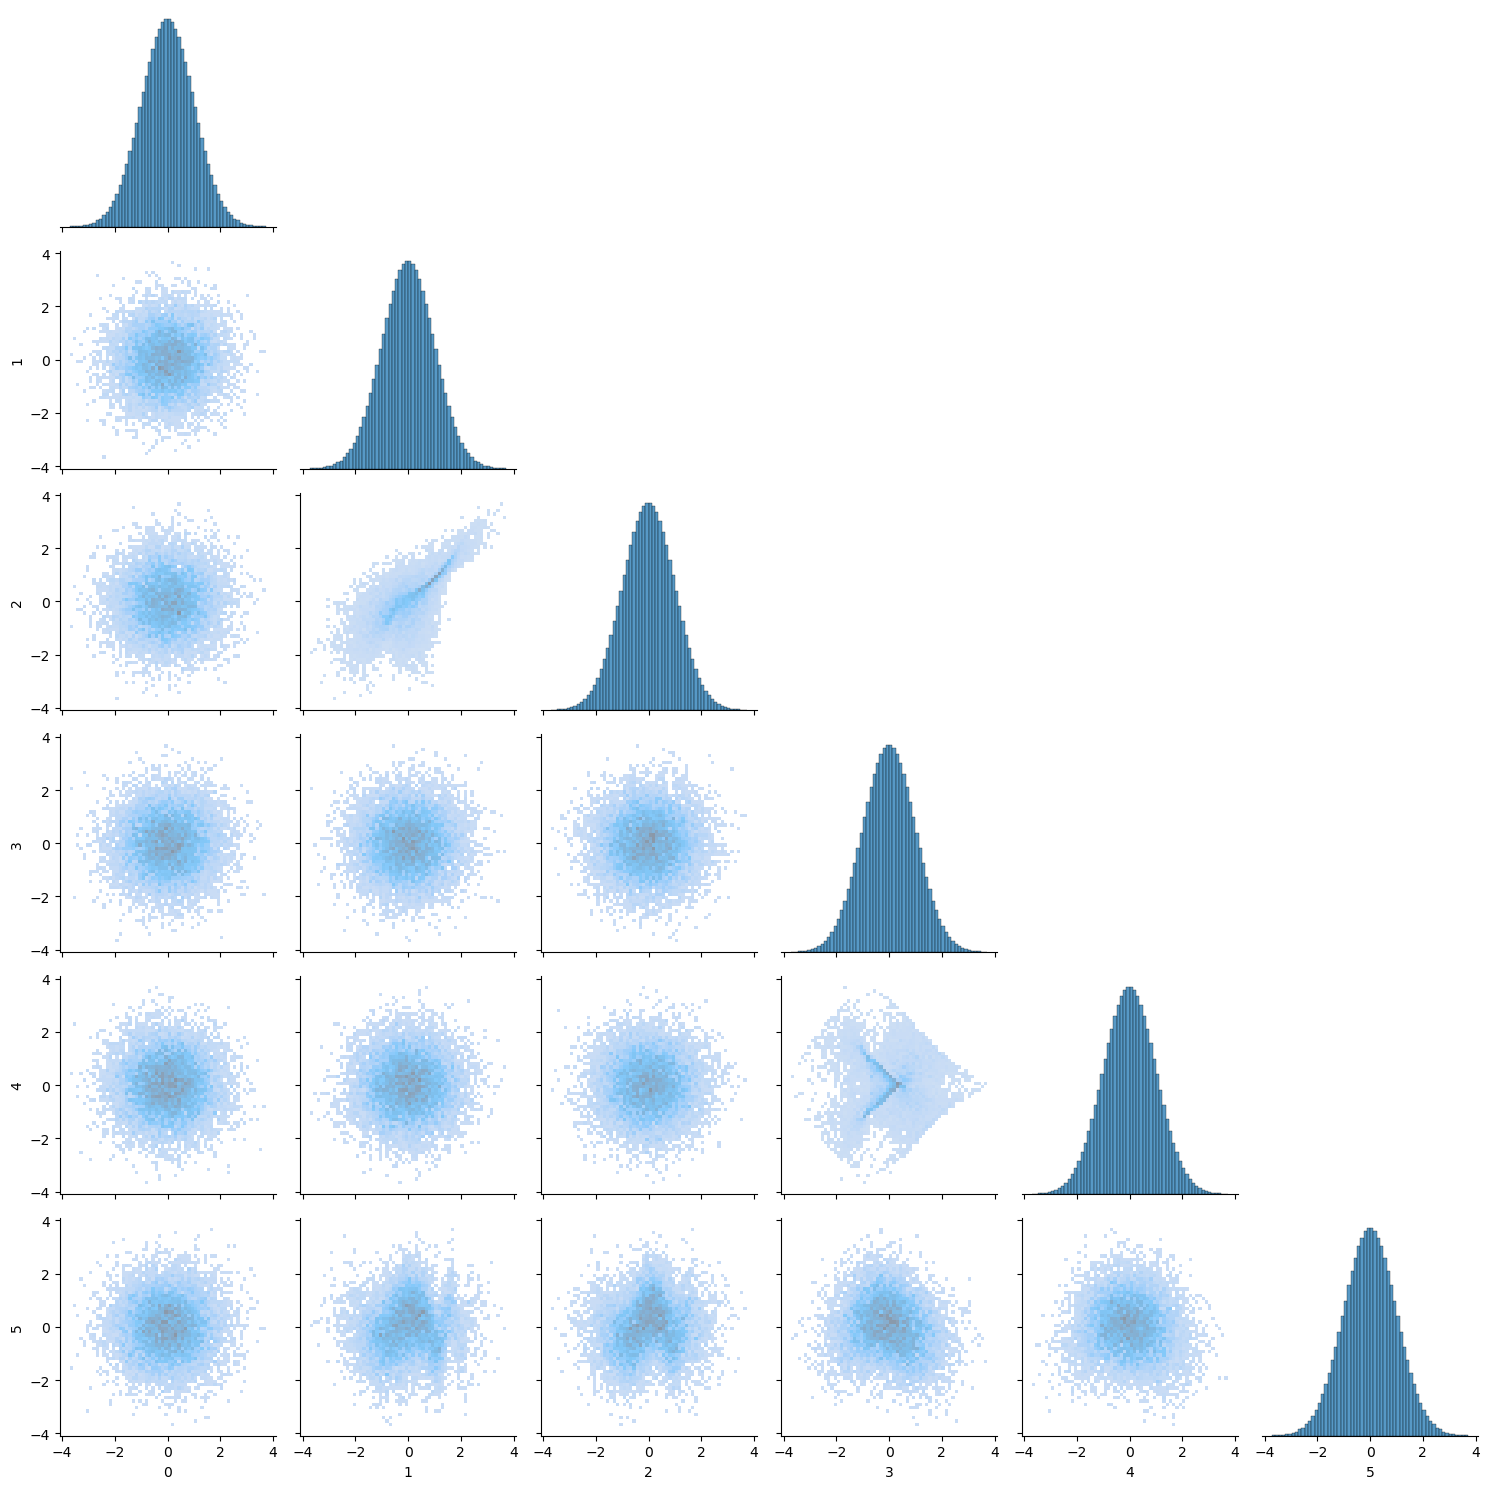

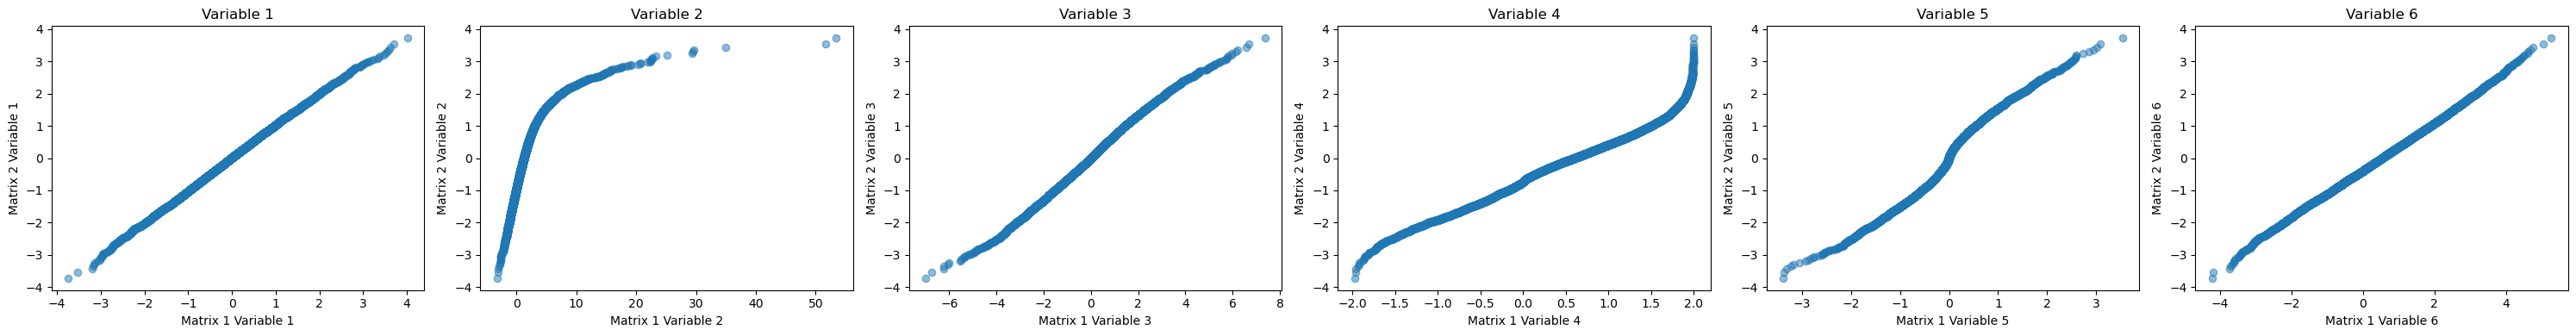

In [4]:
X_cols = [f'X{i}' for i in range(1,7)]

# generate_herarchical_synergy
data = generate_herarchical_synergy(alpha=1., beta=1., n=10000)
gaussian_data, covmat = data2gaussian(data[X_cols].values)


plot_pairwise_distributions(data[X_cols])
plot_pairwise_distributions(pd.DataFrame(gaussian_data))
plot_variable_pairs(data[X_cols].values, gaussian_data)

In [6]:
nplets_tc, nplets_dtc, nplets_o, nplets_s = nplet_tc_dtc(data[X_cols].values)
print(nplets_o)

tensor([0.0023])
